<a href="https://colab.research.google.com/github/SutapaNayak/Supportvectormachine/blob/main/DIgitclassification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


In [40]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
digits=load_digits()

In [42]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

Shape of datasets

In [43]:
print("Images data shape:", digits.data.shape)
print("labels data shape:", digits.target.shape)

Images data shape: (1797, 64)
labels data shape: (1797,)


Displays some of images of datasets

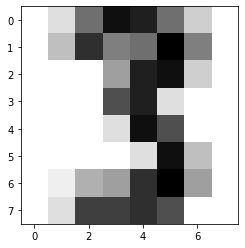

In [44]:
image=digits.data[13]
plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.binary,interpolation="nearest")
plt.show()

Spliting of train and test data set

In [45]:
x_train,x_test,y_train,y_test= train_test_split(digits.data, digits.target,test_size=0.3,random_state=10)

In [46]:
print("X train shape:" , x_train.shape)
print("Y train shape:" , y_train.shape)

X train shape: (1257, 64)
Y train shape: (1257,)


In [47]:
print("X test shape:" , x_test.shape)
print("Y test shape:" , y_test.shape)

X test shape: (540, 64)
Y test shape: (540,)


In [48]:
from sklearn import svm 

In [49]:
digitssvm=svm.SVC(kernel="linear")
#Training of the model 
digitssvm.fit(x_train,y_train)
#Testing of our trained model 
pred=digitssvm.predict(x_test)

Classfication Accracy:

In [50]:
c_accuracy=accuracy_score(y_test,pred)
print("Classification accuracy of the model:",c_accuracy)

Classification accuracy of the model: 0.9814814814814815


In [51]:
c_error=1-c_accuracy
print(" Classification error of the model:", c_error)

 Classification error of the model: 0.01851851851851849


In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        57
           2       1.00      1.00      1.00        55
           3       1.00      0.98      0.99        56
           4       0.98      1.00      0.99        51
           5       0.94      1.00      0.97        51
           6       1.00      0.98      0.99        55
           7       0.98      1.00      0.99        60
           8       0.96      0.90      0.93        50
           9       0.96      0.96      0.96        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



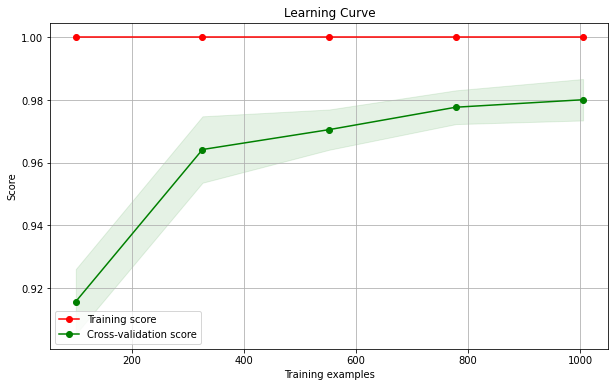

In [53]:
skplt.estimators.plot_learning_curve(digitssvm,x_train,y_train,figsize=(10,6))
plt.show()

In [56]:
cm=confusion_matrix(y_test,pred)
print(cm)

[[51  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  1  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  1  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  1  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0]
 [ 0  0  0  0  1  2  0  0 45  2]
 [ 0  0  0  0  0  1  0  1  0 52]]
